### Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import array as array
from scipy.stats import pearsonr
%matplotlib inline
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
#pd.set_option("display.max_rows", None, "display.max_columns", None)

### Data Loading

In [8]:
demographics=pd.read_csv("data/income/demographic.csv")
c_results=pd.read_csv("data/output/countyData.csv")
s_results=pd.read_csv("data/output/stateData.csv")
print('County result:',c_results.shape)
print('State result:',s_results.shape)
print('demographic:',demographics.shape)

County result: (4682, 7)
State result: (64, 5)
demographic: (3220, 37)


### Data Cleaning - Demographics

In [9]:
#Porto Rico doesnt vote
demographics.drop(demographics[demographics.State=='Puerto Rico'].index, inplace=True)

#Drop Columns
demographics.drop(['CountyId','IncomeErr','IncomePerCapErr'], axis=1, inplace=True)

#General Data adjustment for mapping
demographics['County'] = demographics['County'].str.replace(' County', '')
demographics['County'] = demographics['County'].str.replace(' Parish', '')
demographics['County'] = demographics['County'].str.replace(' parish', '')

#Virginia
m = demographics['State'] == 'Virginia'
demographics.loc[m, 'County'] = demographics.loc[m, 'County'].replace({' city': ''}, regex=True)
demographics.loc[m, 'County'] = demographics.loc[m, 'County'].replace({' City': ''}, regex=True)

#Alaska
m = demographics['State'] == 'Alaska'
demographics.loc[m, 'County'] = 'Alaska'

#Alaska Merge

#Sorting
demographics.sort_values(by=['State', 'County'], inplace=True, ascending=True)

### Data Cleaning - c_result

In [10]:
#Drop NA for Now until fix
c_results=c_results.dropna()

#TEMPORARY FIX /// Drop all Alaska Except one
c_results.drop(c_results[(c_results.state=='Alaska') & (c_results.county_id > 13)].index, inplace=True)

#Sorting
#c_results.sort_values(by=['state', 'county'], inplace=True, ascending=True)

### Data Cleaning - s_result

In [11]:
#Drop NA for Now until fix
s_results=s_results.dropna()

#Sorting
#c_results.sort_values(by=['state', 'county'], inplace=True, ascending=True)

### Data County Merge

In [12]:
County_merged=pd.merge(right=demographics, left=c_results, right_on=['State','County'], left_on=['state','county'])
County_merged.drop(['State', 'County'], axis=1, inplace=True)
County_merged['state_id'] = County_merged['state_id'].astype("Int32")
County_merged['county_id'] = County_merged['county_id'].astype("Int32")
County_merged.shape
County_merged.to_csv (r'data/output/Merged_County_V1.csv', index = False, header=True)

### Data State Merge

In [13]:
def wAvrgAggr(df, cName):
    totalW = 0.0
    totVal = 0.0
    for value, weight in zip(df[cName], df['TotalPop']):
        totVal += float(value) * float(weight)
        totalW += weight
    return totVal/totalW

def sumAggregation(df, cName):
    return df[cName].sum()

def weighted_median(df, val):
    df_sorted = df.sort_values(val)
    cumsum = df_sorted['TotalPop'].cumsum()
    cutoff = df_sorted['TotalPop'].sum() / 2.
    return df_sorted[cumsum >= cutoff][val].iloc[0]

In [14]:
s_results 


,state,state_id,DEM_votes,REP_votes,normalized_election_outcome
1,Alabama,1.0,843473.0,1434159.0,0.370329
2,Alaska,2.0,143037.0,179080.0,0.444053
3,Arizona,4.0,1672054.0,1661677.0,0.501556
4,Arkansas,5.0,419258.0,758183.0,0.356076
5,California,6.0,10760110.0,5750654.0,0.651703
6,Colorado,8.0,1803873.0,1364160.0,0.569398
7,Connecticut,9.0,1080387.0,714973.0,0.601766
8,Delaware,10.0,296268.0,200603.0,0.596267
9,District of Columbia,11.0,307265.0,18172.0,0.944161
10,Florida,12.0,5294767.0,5667474.0,0.483000


### NEED SOME WORK FOR WEIGHTED AVERAGE

In [15]:
g = demographics.groupby('State')
demographics['wa']=demographics.Income / g.Income.transform("sum") * demographics.TotalPop
g.wa.sum()

#Results Are too High. I must have made a mistake

State
Alabama                  85052.526500
Alaska                   29045.053217
Arizona                 536780.607774
Arkansas                 45512.761175
California              759714.564592
Colorado                104667.028150
Connecticut             452467.621496
Delaware                328418.178645
District of Columbia    672391.000000
Florida                 328009.341073
Georgia                  81288.843396
Hawaii                  312951.801911
Idaho                    41917.211964
Illinois                149863.480248
Indiana                  73853.129842
Iowa                     33685.296036
Kansas                   31706.252247
Kentucky                 42469.469863
Louisiana                81081.338100
Maine                    90348.393569
Maryland                280782.108812
Massachusetts           517320.187104
Michigan                135826.429494
Minnesota                74080.791981
Mississippi              42143.596717
Missouri                 62701.448805
Montan

#### 3rd Try

In [16]:
stateData = County_merged.copy()
g = stateData.groupby('state')
for state, group in g:
    # Note that TotalPop should be aggregated last, as it is used in the wAvrg
    sumAgg = ['Men','Women','TotalPop','DEM_votes','REP_votes']
    wAvgAgg = ['normalized_election_outcome', 'IncomePerCap', 'Hispanic', 'White','Black','Native','Asian','Pacific', 'Poverty', 'ChildPoverty','Unemployment']
    wMedian = ['Income']
    for col in wMedian: 
        newVal = weighted_median(group, col)
        stateData.loc[(stateData['state'] == state), col] = newVal
    for col in wAvgAgg:  
        newVal = wAvrgAggr(group, col)
        stateData.loc[(stateData['state'] == state), col] = newVal
    for col in sumAgg:
        newVal = sumAggregation(group, col)
        stateData.loc[(stateData['state'] == state), col] = newVal
    
    
    
    # And aggregate the
stateData = stateData[['state','state_id','DEM_votes','REP_votes','normalized_election_outcome', 'TotalPop','Men','Women','Hispanic','White','Black','Native','Asian','Pacific','IncomePerCap', 'Income','Poverty','ChildPoverty','Unemployment']]
stateData = stateData.drop_duplicates()
stateData = stateData.sort_values(by=['state_id'])
stateData['state_id'] = stateData['state_id'].astype("Int32")
stateData = stateData.reset_index(drop=True)


In [17]:
stateData= stateData.sort_values(by=['normalized_election_outcome'])
stateData.to_csv (r'data/output/Merged_State_V1.csv', index = False, header=True)
stateData

,state,state_id,DEM_votes,REP_votes,normalized_election_outcome,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,IncomePerCap,Income,Poverty,ChildPoverty,Unemployment
50,Wyoming,56,73491.0,193559.0,0.269685,583200,298301,284899,9.718460,84.302438,0.989222,2.043968,0.843658,0.066466,31213.715370,60828,11.178200,12.607930,4.734684
48,West Virginia,54,235657.0,544826.0,0.301150,1836843,907621,929222,1.477566,92.266418,3.513424,0.170910,0.754655,0.020222,24774.033985,42573,17.799084,24.562214,7.310871
12,Idaho,16,287031.0,554128.0,0.331605,1657375,830627,826748,12.203475,82.534259,0.633074,1.079033,1.332112,0.119549,25471.297107,51583,14.522345,17.839987,5.386718
36,Oklahoma,40,503890.0,1020280.0,0.332706,3896251,1930615,1965636,10.128892,66.442280,7.150630,7.105878,2.044448,0.147966,26460.557440,50762,16.231372,22.435563,5.749234
34,North Dakota,38,114901.0,235585.0,0.333798,745475,382121,363354,3.333944,85.690489,2.288784,5.195080,1.346852,0.025908,34256.182592,58767,11.035536,11.836304,2.769410
3,Arkansas,5,419258.0,758183.0,0.357242,2977944,1461651,1516293,7.166490,73.007492,15.357785,0.572804,1.412328,0.227613,24426.218718,43504,18.178289,25.837504,6.361166
17,Kentucky,21,772223.0,1326347.0,0.363287,4424376,2179025,2245351,3.442232,85.078763,7.867669,0.179028,1.346071,0.030058,25888.479805,49508,18.312652,24.874913,6.980947
41,South Dakota,46,147642.0,260746.0,0.367546,841153,423653,417500,3.505548,84.015425,1.687188,6.914042,1.383055,0.035296,29090.952216,53807,13.271957,16.679114,3.708207
0,Alabama,1,843473.0,1434159.0,0.370542,4850771,2350806,2499965,4.090538,65.925899,26.394896,0.468075,1.271648,0.019180,25746.341350,46545,17.974093,25.944204,7.552098
42,Tennessee,47,1139376.0,1849820.0,0.386097,6597381,3217073,3380308,5.159686,74.259381,16.670895,0.222115,1.661378,0.044504,27276.787720,48415,16.689894,24.431924,6.669851


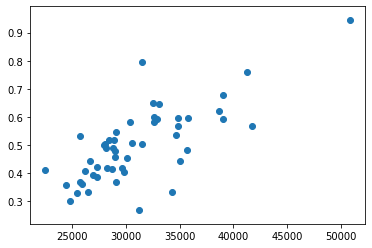

In [18]:
plt.scatter(stateData['IncomePerCap'], stateData['normalized_election_outcome']);